In [1]:
from joblib import load
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
X_train = pd.read_parquet('../data/X_train.parquet')
y_train = pd.read_parquet('../data/y_train.parquet')

X_test  = pd.read_parquet('../data/X_test.parquet')
y_test  = pd.read_parquet('../data/y_test.parquet')

features_selected = ['serum_sodium', 
                     'platelets', 
                     'creatinine_phosphokinase', 
                     'age',
                     'ejection_fraction',
                     'serum_creatinine'
                    ]

X_train = X_train.loc[: , features_selected]
X_test = X_test.loc[: , features_selected]

y_train = y_train['DEATH_EVENT']
y_test = y_test['DEATH_EVENT'] 

In [3]:
lr   = load('../models/logistic_regression.pkl')
lr_r = load('../models/logistic_regression_regularized.pkl')
dt   = load('../models/decision_tree.pkl')
bagg = load('../models/bagging_tree.pkl')
rf   = load('../models/random_forest.pkl')

LR: 0.774762 (0.086453)
LRR: 0.770000 (0.088321)
DT: 0.799286 (0.086845)
BAGGING: 0.789762 (0.073771)
RF: 0.756190 (0.083158)


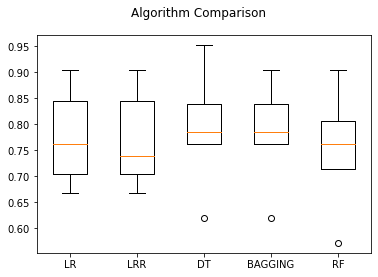

In [5]:
seed = 7
# prepare models
models = []
models.append( ('LR', lr) )
models.append( ('LRR', lr_r) )
models.append( ('DT', dt) )
models.append( ('BAGGING', bagg) )
models.append( ('RF', rf) )

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.691667 (0.311916)
LRR: 0.641667 (0.372771)
DT: 0.813333 (0.216641)
BAGGING: 0.786667 (0.247296)


/home/sebastian/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF: 0.650000 (0.347211)


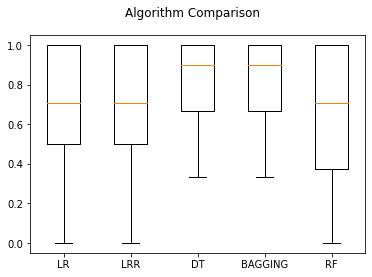

In [6]:
seed = 7
# prepare models
models = []
models.append( ('LR', lr) )
models.append( ('LRR', lr_r) )
models.append( ('DT', dt) )
models.append( ('BAGGING', bagg) )
models.append( ('RF', rf) )

# evaluate each model in turn
results = []
names = []
scoring = 'precision'

for name, model in models:
    kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.392222 (0.255799)
LRR: 0.372222 (0.276988)
DT: 0.452778 (0.260333)
BAGGING: 0.452778 (0.260333)
RF: 0.409444 (0.282690)


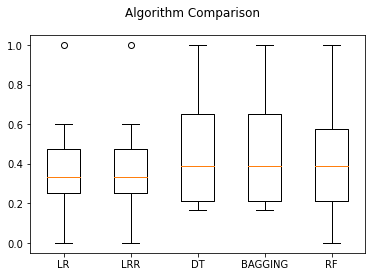

In [7]:
seed = 7
# prepare models
models = []
models.append( ('LR', lr) )
models.append( ('LRR', lr_r) )
models.append( ('DT', dt) )
models.append( ('BAGGING', bagg) )
models.append( ('RF', rf) )

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
    kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**El arbol de decision y el Bagging fueron los que presentaron el mejor desempeño. Se selecciona el Bagging porque presenta menor variabilidad en el accuracy y no hay mucha diferencia con el arbol de decision. En las demás metricas tampoco presenta grandes diferencias con el arbol de decision.**